In [1]:
import os

# Set the base directory (in case you want to
# keep a notebook in a subfolder)
subdir = '/examples'
basedir = os.environ['HOME'] + subdir

os.chdir(basedir)

In [2]:
# Local package imports
from libs.GcmData.GcmDataLoaderExocam import GcmDataLoaderExocam

import libs.utils

## Loading data from a file

In [3]:
# This class has been created by me to make it easier
# to plot data from different models, by standardising
# variable names, where the latitude/longitude center is
# located, amongst other things. It uses the `xarray`
# library under the hood, and usage is as follows:

# The {id} is replaced with the passed in `id`
# whilst the * represents a wildcard match, or
# in other words, match all files with the pattern
loader = GcmDataLoaderExocam(
    id='thai-hab1',
    path='data/{id}.cam.h0.*.nc'
)

# Load the data, returning an xarray Dataset
gcm_data = loader.load()

Centering longitude
Standardising vars


In [4]:
# Output a summary of the data
gcm_data

<xarray.Dataset>
Dimensions:    (time: 511, lat: 46, ilev: 52, lev: 51, lon: 72)
Coordinates:
  * lev        (lev) float64 0.01082 0.01791 0.02957 ... 930.0 970.9 993.0
  * ilev       (ilev) float64 0.008154 0.01348 0.02233 ... 956.4 985.5 1e+03
  * time       (time) object 0001-01-01 00:00:00 ... 0014-12-22 00:00:00
  * lat        (lat) float64 -90.0 -86.0 -82.0 -78.0 ... 78.0 82.0 86.0 90.0
  * lon        (lon) float64 -180.0 -175.0 -170.0 -165.0 ... 165.0 170.0 175.0
Data variables: (12/52)
    gw         (time, lat) float64 dask.array<chunksize=(1, 46), meta=np.ndarray>
    hyai       (time, ilev) float64 dask.array<chunksize=(1, 52), meta=np.ndarray>
    hybi       (time, ilev) float64 dask.array<chunksize=(1, 52), meta=np.ndarray>
    hyam       (time, lev) float64 dask.array<chunksize=(1, 51), meta=np.ndarray>
    hybm       (time, lev) float64 dask.array<chunksize=(1, 51), meta=np.ndarray>
    OMEGA      (time, lev, lat, lon) float32 dask.array<chunksize=(1, 51, 46, 72), meta=np.ndarray>
    ...         ...
    vas        (time, lat, lon) float32 dask.array<chunksize=(1, 46, 72), meta=np.ndarray>
    cld        (time, lev, lat, lon) float32 dask.array<chunksize=(1, 51, 46, 72), meta=np.ndarray>
    cldi       (time, lat, lon) float32 dask.array<chunksize=(1, 46, 72), meta=np.ndarray>
    rt         (time, lat, lon) float32 dask.array<chunksize=(1, 46, 72), meta=np.ndarray>
    rlt        (time, lat, lon) float32 dask.array<chunksize=(1, 46, 72), meta=np.ndarray>
    rst        (time, lat, lon) float32 dask.array<chunksize=(1, 46, 72), meta=np.ndarray>
Attributes:
    Conventions:      CF-1.0
    source:           CAM
    case:             thai-hab1
    title:            UNSET
    logname:          root
    host:             4eb9dd54718a
    Version:          $Name$
    revision_Id:      $Id$
    initial_file:     /home/app/ExoCAM/cesm1.2.1/initial_files/cam_aqua_fv/ic...
    topography_file:  /home/app/ExoCAM/cesm1.2.1/initial_files/cam_aqua_fv/US...
    gcm:              ExoCAM
    id:               thai-hab1

In [5]:
# Output values of a coordinate:
gcm_data.lon

<xarray.DataArray 'lon' (lon: 72)>
array([-180., -175., -170., -165., -160., -155., -150., -145., -140., -135.,
       -130., -125., -120., -115., -110., -105., -100.,  -95.,  -90.,  -85.,
        -80.,  -75.,  -70.,  -65.,  -60.,  -55.,  -50.,  -45.,  -40.,  -35.,
        -30.,  -25.,  -20.,  -15.,  -10.,   -5.,    0.,    5.,   10.,   15.,
         20.,   25.,   30.,   35.,   40.,   45.,   50.,   55.,   60.,   65.,
         70.,   75.,   80.,   85.,   90.,   95.,  100.,  105.,  110.,  115.,
        120.,  125.,  130.,  135.,  140.,  145.,  150.,  155.,  160.,  165.,
        170.,  175.])
Coordinates:
  * lon      (lon) float64 -180.0 -175.0 -170.0 -165.0 ... 165.0 170.0 175.0

## Data manipulation

In [6]:
# Select a variable like so:
# Note that you can find the units under the attributes in the below output
gcm_data['pr']

<xarray.DataArray 'pr' (time: 511, lat: 46, lon: 72)>
dask.array<mul, shape=(511, 46, 72), dtype=float32, chunksize=(1, 46, 72), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 0001-01-01 00:00:00 ... 0014-12-22 00:00:00
  * lat      (lat) float64 -90.0 -86.0 -82.0 -78.0 -74.0 ... 78.0 82.0 86.0 90.0
  * lon      (lon) float64 -180.0 -175.0 -170.0 -165.0 ... 165.0 170.0 175.0
Attributes:
    variable_long_name:    Precipitation
    variable_units:        kg m-2 s-1
    variable_units_latex:  $mm$ $s^{-1}$

In [7]:
# We can take a mean across all timesteps of the data
gcm_slice = gcm_data.mean('time')

# See how gcm_slice compares to gcm_data
gcm_slice

<xarray.Dataset>
Dimensions:    (lat: 46, ilev: 52, lev: 51, lon: 72)
Coordinates:
  * lev        (lev) float64 0.01082 0.01791 0.02957 ... 930.0 970.9 993.0
  * ilev       (ilev) float64 0.008154 0.01348 0.02233 ... 956.4 985.5 1e+03
  * lat        (lat) float64 -90.0 -86.0 -82.0 -78.0 ... 78.0 82.0 86.0 90.0
  * lon        (lon) float64 -180.0 -175.0 -170.0 -165.0 ... 165.0 170.0 175.0
Data variables: (12/52)
    gw         (lat) float64 dask.array<chunksize=(46,), meta=np.ndarray>
    hyai       (ilev) float64 dask.array<chunksize=(52,), meta=np.ndarray>
    hybi       (ilev) float64 dask.array<chunksize=(52,), meta=np.ndarray>
    hyam       (lev) float64 dask.array<chunksize=(51,), meta=np.ndarray>
    hybm       (lev) float64 dask.array<chunksize=(51,), meta=np.ndarray>
    OMEGA      (lev, lat, lon) float32 dask.array<chunksize=(51, 46, 72), meta=np.ndarray>
    ...         ...
    vas        (lat, lon) float32 dask.array<chunksize=(46, 72), meta=np.ndarray>
    cld        (lev, lat, lon) float32 dask.array<chunksize=(51, 46, 72), meta=np.ndarray>
    cldi       (lat, lon) float32 dask.array<chunksize=(46, 72), meta=np.ndarray>
    rt         (lat, lon) float32 dask.array<chunksize=(46, 72), meta=np.ndarray>
    rlt        (lat, lon) float32 dask.array<chunksize=(46, 72), meta=np.ndarray>
    rst        (lat, lon) float32 dask.array<chunksize=(46, 72), meta=np.ndarray>

In [8]:
# We can also take a mean across longitude and latitude
# BUT, as grid cells vary in size, we have to perform 
# a "weighted average". But, I've created a helper for
# this, which can be accessed through `.gcm_data.weighted_lat()`

gcm_data.gcm_data\
    .weighted_lat()\
    .mean(('lat', 'lon'))

<xarray.Dataset>
Dimensions:    (time: 511, ilev: 52, lev: 51)
Coordinates:
  * time       (time) object 0001-01-01 00:00:00 ... 0014-12-22 00:00:00
  * ilev       (ilev) float64 0.008154 0.01348 0.02233 ... 956.4 985.5 1e+03
  * lev        (lev) float64 0.01082 0.01791 0.02957 ... 930.0 970.9 993.0
Data variables: (12/52)
    gw         (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    hyai       (time, ilev) float64 dask.array<chunksize=(1, 52), meta=np.ndarray>
    hybi       (time, ilev) float64 dask.array<chunksize=(1, 52), meta=np.ndarray>
    hyam       (time, lev) float64 dask.array<chunksize=(1, 51), meta=np.ndarray>
    hybm       (time, lev) float64 dask.array<chunksize=(1, 51), meta=np.ndarray>
    OMEGA      (time, lev) float64 dask.array<chunksize=(1, 51), meta=np.ndarray>
    ...         ...
    vas        (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    cld        (time, lev) float64 dask.array<chunksize=(1, 51), meta=np.ndarray>
    cldi       (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    rt         (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    rlt        (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    rst        (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>

In [9]:
# Alternatively, we may want to find the total value
# of something, for example total precipitation (`pr`).
# We again need to use the weighted function for this.
# See how different functions can be 'chained' together 
# to get a time-mean and latitude-longitude sum of `pr`:
# NB Units will be in: kg per second
gcm_data\
    .gcm_data.weighted_lat()\
    .sum(('lat', 'lon'))\
    .mean('time')\
    ['pr']\
    .values

array(0.03813004)

In [10]:
# It is possible to select a particular timestep, latitude, 
# and/or longitude. You can add method='nearest' to find the
# nearest datapoint to the input value
gcm_data.sel(lat=80, method='nearest')

<xarray.Dataset>
Dimensions:    (time: 511, ilev: 52, lev: 51, lon: 72)
Coordinates:
  * lev        (lev) float64 0.01082 0.01791 0.02957 ... 930.0 970.9 993.0
  * ilev       (ilev) float64 0.008154 0.01348 0.02233 ... 956.4 985.5 1e+03
  * time       (time) object 0001-01-01 00:00:00 ... 0014-12-22 00:00:00
    lat        float64 82.0
  * lon        (lon) float64 -180.0 -175.0 -170.0 -165.0 ... 165.0 170.0 175.0
Data variables: (12/52)
    gw         (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    hyai       (time, ilev) float64 dask.array<chunksize=(1, 52), meta=np.ndarray>
    hybi       (time, ilev) float64 dask.array<chunksize=(1, 52), meta=np.ndarray>
    hyam       (time, lev) float64 dask.array<chunksize=(1, 51), meta=np.ndarray>
    hybm       (time, lev) float64 dask.array<chunksize=(1, 51), meta=np.ndarray>
    OMEGA      (time, lev, lon) float32 dask.array<chunksize=(1, 51, 72), meta=np.ndarray>
    ...         ...
    vas        (time, lon) float32 dask.array<chunksize=(1, 72), meta=np.ndarray>
    cld        (time, lev, lon) float32 dask.array<chunksize=(1, 51, 72), meta=np.ndarray>
    cldi       (time, lon) float32 dask.array<chunksize=(1, 72), meta=np.ndarray>
    rt         (time, lon) float32 dask.array<chunksize=(1, 72), meta=np.ndarray>
    rlt        (time, lon) float32 dask.array<chunksize=(1, 72), meta=np.ndarray>
    rst        (time, lon) float32 dask.array<chunksize=(1, 72), meta=np.ndarray>
Attributes:
    Conventions:      CF-1.0
    source:           CAM
    case:             thai-hab1
    title:            UNSET
    logname:          root
    host:             4eb9dd54718a
    Version:          $Name$
    revision_Id:      $Id$
    initial_file:     /home/app/ExoCAM/cesm1.2.1/initial_files/cam_aqua_fv/ic...
    topography_file:  /home/app/ExoCAM/cesm1.2.1/initial_files/cam_aqua_fv/US...
    gcm:              ExoCAM
    id:               thai-hab1

In [11]:
gcm_data.sel(lat=80, lon=80, method='nearest')

<xarray.Dataset>
Dimensions:    (time: 511, ilev: 52, lev: 51)
Coordinates:
  * lev        (lev) float64 0.01082 0.01791 0.02957 ... 930.0 970.9 993.0
  * ilev       (ilev) float64 0.008154 0.01348 0.02233 ... 956.4 985.5 1e+03
  * time       (time) object 0001-01-01 00:00:00 ... 0014-12-22 00:00:00
    lat        float64 82.0
    lon        float64 80.0
Data variables: (12/52)
    gw         (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    hyai       (time, ilev) float64 dask.array<chunksize=(1, 52), meta=np.ndarray>
    hybi       (time, ilev) float64 dask.array<chunksize=(1, 52), meta=np.ndarray>
    hyam       (time, lev) float64 dask.array<chunksize=(1, 51), meta=np.ndarray>
    hybm       (time, lev) float64 dask.array<chunksize=(1, 51), meta=np.ndarray>
    OMEGA      (time, lev) float32 dask.array<chunksize=(1, 51), meta=np.ndarray>
    ...         ...
    vas        (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    cld        (time, lev) float32 dask.array<chunksize=(1, 51), meta=np.ndarray>
    cldi       (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    rt         (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    rlt        (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    rst        (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
Attributes:
    Conventions:      CF-1.0
    source:           CAM
    case:             thai-hab1
    title:            UNSET
    logname:          root
    host:             4eb9dd54718a
    Version:          $Name$
    revision_Id:      $Id$
    initial_file:     /home/app/ExoCAM/cesm1.2.1/initial_files/cam_aqua_fv/ic...
    topography_file:  /home/app/ExoCAM/cesm1.2.1/initial_files/cam_aqua_fv/US...
    gcm:              ExoCAM
    id:               thai-hab1

In [12]:
gcm_data.sel(time='0014-09-13')

<xarray.Dataset>
Dimensions:    (time: 1, lat: 46, ilev: 52, lev: 51, lon: 72)
Coordinates:
  * lev        (lev) float64 0.01082 0.01791 0.02957 ... 930.0 970.9 993.0
  * ilev       (ilev) float64 0.008154 0.01348 0.02233 ... 956.4 985.5 1e+03
  * time       (time) object 0014-09-13 00:00:00
  * lat        (lat) float64 -90.0 -86.0 -82.0 -78.0 ... 78.0 82.0 86.0 90.0
  * lon        (lon) float64 -180.0 -175.0 -170.0 -165.0 ... 165.0 170.0 175.0
Data variables: (12/52)
    gw         (time, lat) float64 dask.array<chunksize=(1, 46), meta=np.ndarray>
    hyai       (time, ilev) float64 dask.array<chunksize=(1, 52), meta=np.ndarray>
    hybi       (time, ilev) float64 dask.array<chunksize=(1, 52), meta=np.ndarray>
    hyam       (time, lev) float64 dask.array<chunksize=(1, 51), meta=np.ndarray>
    hybm       (time, lev) float64 dask.array<chunksize=(1, 51), meta=np.ndarray>
    OMEGA      (time, lev, lat, lon) float32 dask.array<chunksize=(1, 51, 46, 72), meta=np.ndarray>
    ...         ...
    vas        (time, lat, lon) float32 dask.array<chunksize=(1, 46, 72), meta=np.ndarray>
    cld        (time, lev, lat, lon) float32 dask.array<chunksize=(1, 51, 46, 72), meta=np.ndarray>
    cldi       (time, lat, lon) float32 dask.array<chunksize=(1, 46, 72), meta=np.ndarray>
    rt         (time, lat, lon) float32 dask.array<chunksize=(1, 46, 72), meta=np.ndarray>
    rlt        (time, lat, lon) float32 dask.array<chunksize=(1, 46, 72), meta=np.ndarray>
    rst        (time, lat, lon) float32 dask.array<chunksize=(1, 46, 72), meta=np.ndarray>
Attributes:
    Conventions:      CF-1.0
    source:           CAM
    case:             thai-hab1
    title:            UNSET
    logname:          root
    host:             4eb9dd54718a
    Version:          $Name$
    revision_Id:      $Id$
    initial_file:     /home/app/ExoCAM/cesm1.2.1/initial_files/cam_aqua_fv/ic...
    topography_file:  /home/app/ExoCAM/cesm1.2.1/initial_files/cam_aqua_fv/US...
    gcm:              ExoCAM
    id:               thai-hab1

In [13]:
# You can also select a time range or 'slice', e.g.:
gcm_data.sel(time=slice('0014-09-13', '0014-12-22'))

<xarray.Dataset>
Dimensions:    (time: 11, lat: 46, ilev: 52, lev: 51, lon: 72)
Coordinates:
  * lev        (lev) float64 0.01082 0.01791 0.02957 ... 930.0 970.9 993.0
  * ilev       (ilev) float64 0.008154 0.01348 0.02233 ... 956.4 985.5 1e+03
  * time       (time) object 0014-09-13 00:00:00 ... 0014-12-22 00:00:00
  * lat        (lat) float64 -90.0 -86.0 -82.0 -78.0 ... 78.0 82.0 86.0 90.0
  * lon        (lon) float64 -180.0 -175.0 -170.0 -165.0 ... 165.0 170.0 175.0
Data variables: (12/52)
    gw         (time, lat) float64 dask.array<chunksize=(1, 46), meta=np.ndarray>
    hyai       (time, ilev) float64 dask.array<chunksize=(1, 52), meta=np.ndarray>
    hybi       (time, ilev) float64 dask.array<chunksize=(1, 52), meta=np.ndarray>
    hyam       (time, lev) float64 dask.array<chunksize=(1, 51), meta=np.ndarray>
    hybm       (time, lev) float64 dask.array<chunksize=(1, 51), meta=np.ndarray>
    OMEGA      (time, lev, lat, lon) float32 dask.array<chunksize=(1, 51, 46, 72), meta=np.ndarray>
    ...         ...
    vas        (time, lat, lon) float32 dask.array<chunksize=(1, 46, 72), meta=np.ndarray>
    cld        (time, lev, lat, lon) float32 dask.array<chunksize=(1, 51, 46, 72), meta=np.ndarray>
    cldi       (time, lat, lon) float32 dask.array<chunksize=(1, 46, 72), meta=np.ndarray>
    rt         (time, lat, lon) float32 dask.array<chunksize=(1, 46, 72), meta=np.ndarray>
    rlt        (time, lat, lon) float32 dask.array<chunksize=(1, 46, 72), meta=np.ndarray>
    rst        (time, lat, lon) float32 dask.array<chunksize=(1, 46, 72), meta=np.ndarray>
Attributes:
    Conventions:      CF-1.0
    source:           CAM
    case:             thai-hab1
    title:            UNSET
    logname:          root
    host:             4eb9dd54718a
    Version:          $Name$
    revision_Id:      $Id$
    initial_file:     /home/app/ExoCAM/cesm1.2.1/initial_files/cam_aqua_fv/ic...
    topography_file:  /home/app/ExoCAM/cesm1.2.1/initial_files/cam_aqua_fv/US...
    gcm:              ExoCAM
    id:               thai-hab1

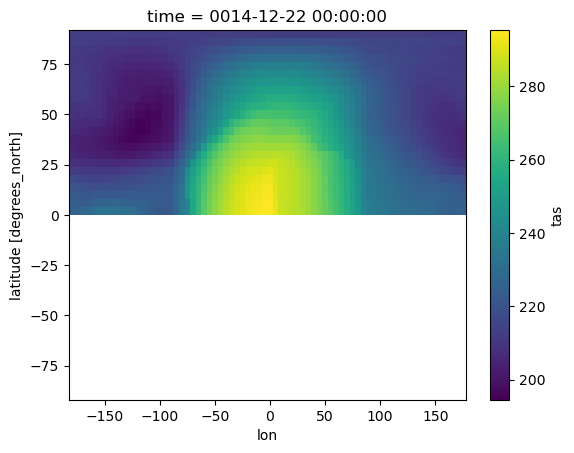

In [14]:
# It is also possible to 'mask' or 'filter' the data.
# Taking final time step of surface air temperature for examples
gcm_slice_tas = gcm_data\
    .isel(time=-1)\
    ['tas']

# Mask data to northern hemisphere and plot
gcm_slice_tas\
    .where(gcm_slice_tas.lat > 0)\
    .plot(x='lon', y='lat')

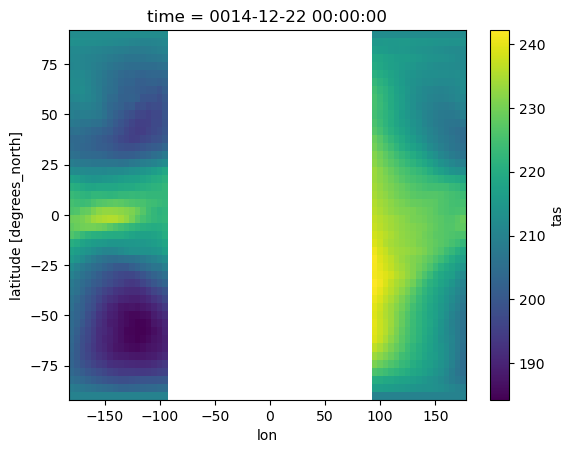

In [15]:
# If using multiple conditions, note the use of brackets.
# | means "or"
# & means "and"
# Mask data to night-side of tidally-locked planet and plot
gcm_slice_tas\
    .where(
        (gcm_slice_tas.lon < -90) | (gcm_slice_tas.lon > 90)
    )\
    .plot(x='lon', y='lat')

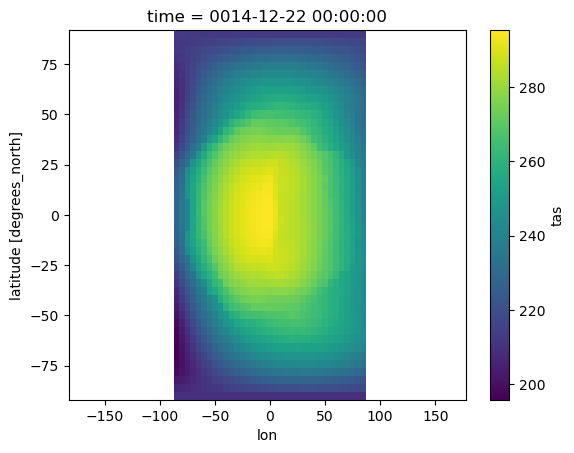

In [16]:
# Mask data to day-side of tidally-locked planet and plot
gcm_slice_tas\
    .where(
        (gcm_slice_tas.lon < 90) & (gcm_slice_tas.lon > -90)
    )\
    .plot(x='lon', y='lat')